# Peculiar Velocity Catalogs and Models

**Author:** Gabriel Henrique Souza Cardoso <sup>1 #</sup> <br/>
<sup>1</sup> Eötvös Loránd University <br/>
<sup>#</sup> gabrielhsc95@gmail.com <br/>

***Last Update:*** 2020.04.15

This notebook is to read and compare different catalogs and models of peculiar velocity. It is also creates a new catalog that matches the data used. If you have any question you can ask me at gabrielhsc95@gmail.com

## Libraries

Since we are dealing with astronomy, a good library to handle units is Astropy (available at <link>https://www.astropy.org/</link>), it can be easily be installed using <code>pip</code>. 

It was created the function <code>cosmocalc_DL_Mpc</code> based on the package cosmocalc (<link>https://cxc.harvard.edu/contrib/cosmocalc/</link>) by Tom Aldcroft. It was made for Python 2, so it doesn't actually work properly in Python 3, but it easy to fix, you just need to fix the <code>print</code> function on line 253 in the source code just by adding the parentheses. It is also not very efficient, that's why it was created the function, so it is not necessary to install it.

Some usual scientific libraries are used like numpy, pandas and matplotlib are also used, which are also available to install via <code>pip</code>.

Other than that, some other standart libraries were used like csv, warnings and pickle.

In [1]:
## review the necessary libraries

import csv
import numpy as np
#from cosmocalc import cosmocalc
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import warnings
import pickle
from gabupy import *

## Constants

All the following code is dependend on two constants. The Hubble parameter ($ H_0 $) which can be set on the variable <code>H_0</code>, the value used is from the Planck Collaboration 2018 data release. The other constant is the uncertainty value for the peculiar velocity that is store in the variable <code>error_factor</code>, this number was infer in the **Gadget-2 Analysis Notebook**.

In [2]:
H_0 = 67.66
error_factor = 623

In [3]:
galaxies = [] # List that constains the Galaxy class

## Catalogs

First we are going to collec the data from the catalogs, after that, based on the position we will also see peculiar velocity value for the entries.

### 2Mass Tully-Fisher Catalog (2MTF)

The first catalog is the 2Mass Tully-Fisher

Paper:  <link>https://arxiv.org/abs/1905.08530</link> or <link>https://academic.oup.com/mnras/article-abstract/487/2/2061/5497933<link>

Data: <link>https://academic.oup.com/mnras/article/487/2/2061/5497933#supplementary-data</link> (It is the Table 2 that containts the peculiar velocity values)
 

In [4]:
# Read the dat file.
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/2MTF/Table_2.dat', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 9):
        next(reader)
    
    num = 0 # First unique number for the Galaxy class, index in the catalog
    
    for row in reader:
        #Collect Data
        name = row[0] # 2MASS
        v_k = float(row[8]) # km/s
        e_vk  = float(row[9]) # km/s
        v_h  = float(row[10]) # km/s
        e_vh = float(row[11]) # km/s
        v_j   = float(row[12]) # km/s
        e_vj  = float(row[13]) # km/s
        wf_k  = float(row[14]) # km/s
        e_wfk  = float(row[15]) # km/s
        wf_h  = float(row[16]) # km/s
        e_wfh  = float(row[17]) # km/s
        wf_j  = float(row[18]) # km/s
        e_wfj  = float(row[19]) # km/s
        
        
        #Position
        # hhmmssss -> deg
        RA = float(row[0][0:2])*15.0 + float(row[0][2:4])*0.25 + float(row[0][4:8])*(360.0/8640000.0)
        # ddmmsss - deg
        dec =  float(row[0][9:11]) + float(row[0][11:13])/60.0 + float(row[0][13:16])/36000.0
        if row[0][8:9] == "-":
            dec *= -1.0
        
        g = Galaxy(num, name, None, RA, dec)
        g.v2MTF_H = v_h
        g.e2MTF_H = e_vh
        g.v2MTF_J = v_j
        g.e2MTF_J = e_vj
        g.v2MTF_K = v_k
        g.e2MTF_K = e_vk
        g.v2MTF_WF15_H = wf_h
        g.e2MTF_WF15_H = e_wfh
        g.v2MTF_WF15_J = wf_j
        g.e2MTF_WF15_J = e_wfj
        g.v2MTF_WF15_K = e_wfk
        g.e2MTF_WF15_K = wf_k
        galaxies.append(g)
        num += 1

## Warnings

For the key 1046, which is

| 2MASSname | cz_CMB | logd_km | err_km | logd_hm | err_hm | logd_jm | err_jm | v_k | e_vk | v_h | e_vh | v_j | e_vj | wf_k | e_wfk | wf_h | e_wfh | wf_j | e_wfj | flag |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 11550231+2717521 | 6922 | -0.0043 | 0.0958 | -0.0019 | 0.0932 | 0.0072 | 0.0971 | -38.57 | 8.53 | 0.01 | 0.00 | 143.57 | 32.07 | -68.54 | 1526.91 | -30.28 | 1485.47 | 114.76 | 1547.63 | -- |

It will be ignored the velocity value <code>v_h</code> because its error value is zero (<code>e_vh</code>)


The paper also raises attention to other two entries

| 2MASSname | cz_CMB | logd_km | err_km | logd_hm | err_hm | logd_jm | err_jm | v_k | e_vk | v_h | e_vh | v_j | e_vj | wf_k | e_wfk | wf_h | e_wfh | wf_j | e_wfj | flag |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 09220265+5058353 | 812 | -0.3673 | 0.0863 | -0.3447 | 0.0808 | -0.3417 | 0.0858 | -1141.81 | 226.10 | -1043.11 | 194.55 | -1030.04 | 203.97 | -686.74 | 161.36 | -644.49 | 151.07 | -638.88 | 160.42 | -- |
| 00383973+1724113 | 5082 | 0.4413 | 0.1429 | 0.4419 | 0.1498 | 0.4258 | 0.1499 | 3243.98 | 1068.15 | 3246.34 | 1121.25 | 3176.96 | 1097.28 | 5163.98 | 1672.18 | 5171.00 | 1752.92 | 4982.60 | 1754.09 | -- |

The unique number generate in this work, 09220265+5058353 is 748 and 00383973+1724113 is 62.


## Match between 2MASS and 	PGC

The first catalogs (2MTF) uses the 2MASS name, but the other ones have PGC name, so finding the name for matches is important because it is easier to combine by name not position.

Collect the match between the two catalog names by using GLADE, since it still stores the name of each catalog used. This first code just loads it in the memory, but it searches through the whole GLADE catalog. 

This is the whole macth between 2MASS and PGC, so it includes galaxies outside the range of the 2MTF catalog.

In [5]:
with open('/media/gabriel/Data/University/ELTE/Thesis/GLADE/GLADE_2.3.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|', skipinitialspace=True)
    
    matched = 0
    PGC = []
    TwoMASS = []
    for row in reader:
        if row[0] != 'null' and row[3] != 'null':
            PGC.append(row[0])
            TwoMASS.append(row[3])
            matched += 1

print("There was", matched, "matches between 2MASS and PGC")

There was 26021 matches between 2MASS and PGC


To not load the whole GLADE catalog every single time, it is good to save the matching data, the next routine just saves it in a txt file where the first column is the name on PGC and the second column the equivalent in the 2MASS 

In [6]:
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/matching.txt', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    for i in range(len(PGC)):
        writer.writerow([PGC[i], TwoMASS[i]])

If you have the matching data computed from the previous two pieces of code, you can load it to the memory with the following

In [8]:
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/matching.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
    
    PGC = []
    TwoMASS = []
    for row in reader:
        PGC.append(row[0])
        TwoMASS.append(row[1])

Since most of the catalogs used the PGC name, it will be the main name used for this work, and the name will be used for matching all the catalog together, it is faster and easier than redo it by position.

To find the galaxies afterwards where we did the name change, it will store (just in the memory) the unique id created in this work and new PGC name

In [7]:
num_id = []
PGC_id = []
changed_names = 0

for g in galaxies:
    for i in range(len(PGC)):
        if g.name == TwoMASS[i]:
            g.name = PGC[i]
            num_id.append(g.num)
            PGC_id.append(PGC[i])
            changed_names += 1

print("The name of", changed_names, "galaxies were changed for PGC")

The name of 1246 galaxies were changed for PGC


## Cosmicflows-3

Paper: <link>https://arxiv.org/abs/1605.01765</link> or <link>https://iopscience.iop.org/article/10.3847/0004-6256/152/2/50</link>

Data: <link>http://edd.ifa.hawaii.edu/dfirst.php</link> (it was download the whole table using tab as delimiter)

TODO

In [8]:
# Unique ID
num = galaxies[-1].num + 1 # Last number + 1

# Read the dat file.
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/CF-3.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 5):
        next(reader)
          
    for row in reader:
        #Collect data
        name = row[0] # PGC
        dist = float(row[1]) #Mpc
        # hhmmss.s - > deg
        RA = float(row[24][0:2])*15.0 + float(row[24][2:4])*0.25 + float(row[24][4:8])*(360.0/86400.0)
        # ddmmss -> deg
        dec = float(row[25][1:3]) + float(row[25][3:5])/60.0 + float(row[25][5:7])/360.0 #deg
        if row[25][0:1] == "-":
            dec *= -1.0
        hubble_flow = H_0*dist
        vel_cmb = float(row[37]) # km/s
        vel_cmb_mod = float(row[38]) # km/s
        vp = vel_cmb - hubble_flow
        vp_mod = vel_cmb_mod - hubble_flow
        
        # Error
        e_vp = error_factor
        e_vp_mod = error_factor
        
        if name in PGC_id:
            # Find the index of the PGC
            index_name = PGC_id.index(name)
            # Find the unique number assigned to this galaxy
            index_id = num_id[index_name]
            galaxies[index_id].vCF3 = vp
            galaxies[index_id].eCF3 = e_vp
            galaxies[index_id].vCF3_mod = vp_mod
            galaxies[index_id].eCF3_mod = e_vp_mod
            
            if galaxies[index_id].dist == None:
                galaxies[index_id].dist = dist
        else:
            g = Galaxy(num, name, dist, RA, dec)
            g.vCF3 = vp
            g.eCF3 = e_vp
            g.vCF3_mod = vp_mod
            g.eCF3_mod = e_vp_mod
            galaxies.append(g)
            # New PGC names
            num_id.append(num)
            PGC_id.append(name)
            num += 1
            

## 6dFGS Catalog

Paper: <link>https://academic.oup.com/mnras/article/445/3/2677/1036663</link> or <link>https://arxiv.org/abs/1409.6161</link>

Data: <link>http://edd.ifa.hawaii.edu/dfirst.php</link> (it was download the whole table using tab as delimiter)

TODO

In [9]:
# Unique ID
num = galaxies[-1].num + 1

# Read the dat file.
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/6dFGS_sample.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 5):
        next(reader)
          
    for row in reader:
        # Collect data
        name = row[0] # PGC
        v_cmb = float(row[14]) # km/s
        dist = float(row[22]) #Mpc, it was used H_0 = 75
        hubble_flow = H_0*dist
        vp = v_cmb - hubble_flow
        RA = float(row[38]) # deg
        dec = float(row[39]) # deg
        
        # Error 100% (1.0)
        e_vp = error_factor
        
        if name in PGC_id:
            # Find the index of the PGC
            index_name = PGC_id.index(name)
            # Find the unique number assigned to this galaxy
            index_id = num_id[index_name]
            # Adjust for proper index in lists
            galaxies[index_id].v6dFGS = vp
            galaxies[index_id].e6dFGS = e_vp
            
            if galaxies[index_id].dist == None:
                galaxies[index_id].dist = dist
        else:
            g = Galaxy(num, name, dist, RA, dec)
            g.v6dFGS = vp
            g.e6dFGS = e_vp
            galaxies.append(g)
            # New PGC names
            num_id.append(num)
            PGC_id.append(name)
            num += 1
        

## SFI++ catalog

Paper:

Data: <link>http://edd.ifa.hawaii.edu/dfirst.php</link> (it was download the whole table using tab as delimiter)

Distance in km/s

$$ r_{\text{group−malm}} = cz_{\text{group}} − v_{\text{group−malm}} $$

TODO

In [10]:
# Unique ID
num = galaxies[-1].num + 1

# Read the dat file.
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/SFIpp.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 5):
        next(reader)
          
    for row in reader:
        # Collect data
        if row[29] != "": # If there is peculiar velocity data
            name = row[0] # PGC
            # hh mm ss.s -> deg
            RA = float(row[5][1:3])*15.0 + float(row[5][4:6])*0.25 + float(row[5][7:11])*(360.0/86400.0)
            # dd mm ss -> deg
            dec = float(row[6][2:4]) + float(row[6][5:7])/60.0 + float(row[6][8:10])/360.0
            if row[6][1:2] == "-":
                dec *= -1.0
            vp = float(row[29]) # km/s
            e_vp = float(row[30]) # km/s
            dist = float(row[31])/H_0  # km/s -> Mpc


            if name in PGC_id:
                # Find the index of the PGC
                index_name = PGC_id.index(name)
                # Find the unique number assigned to this galaxy
                index_id = num_id[index_name]
                # Adjust for proper index in lists
                galaxies[index_id].vSFIpp = vp
                galaxies[index_id].eSFIpp = e_vp
                
                if galaxies[index_id].dist == None:
                    galaxies[index_id].dist = dist
            else:
                g = Galaxy(num, name, dist, RA, dec)
                g.vSFIpp = vp
                g.eSFIpp = e_vp
                galaxies.append(g)
                # New PGC names
                num_id.append(num)
                PGC_id.append(name)
                num += 1

## Parnovsky RFGC peculiar velocities 

Paper:

Data: <link>http://edd.ifa.hawaii.edu/dfirst.php</link> (it was download the whole table using tab as delimiter)

TODO

In [11]:
# DISTANCE!!!!

num = galaxies[-1].num + 1 # Unique number

# Read the dat file.
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/RFGC.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 5):
        next(reader)
        
    for row in reader:
        name = row[0] # PGC
        # hh mm ss.s -> deg
        RA = float(row[4][1:3])*15.0 + float(row[4][4:6])*0.25 + float(row[4][7:11])*(360.0/86400.0)
        # dd mm ss -> deg
        dec = + float(row[5][2:4]) + float(row[5][5:7])/60.0 + float(row[5][8:10])/360.0
        if row[5][1:2] == "-":
            dec *= -1.0
        dist_D = float(row[13])/H_0 # km/s -> Mpc
        vp_D = float(row[17]) # km/s
        dist_Q = float(row[18])/H_0 # km/s -> Mpc
        vp_Q = float(row[23]) # km/s
        dist_O = float(row[24])/H_0 # km/s -> Mpc
        vp_O = float(row[30]) # km/s
        
        
        # Error (100%)
        e_vp_D = error_factor
        e_vp_Q = error_factor
        e_vp_O = error_factor
        
        if name in PGC_id:
            # Find the index of the PGC
            index_name = PGC_id.index(name)
            # Find the unique number assigned to this galaxy
            index_id = num_id[index_name]
            # Adjust for proper index in lists
            galaxies[index_id].vRFGC_D = vp_D
            galaxies[index_id].eRFGC_D = e_vp_D
            galaxies[index_id].vRFGC_Q = vp_Q
            galaxies[index_id].eRFGC_Q = e_vp_Q
            galaxies[index_id].vRFGC_O = vp_O
            galaxies[index_id].eRFGC_O = e_vp_O
            
            if galaxies[index_id].dist == None:
                galaxies[index_id].dist = dist_O
        else:
            g = Galaxy(num, name, dist_O, RA, dec)
            g.vRFGC_D = vp_D
            g.eRFGC_D = e_vp_D
            g.vRFGC_Q = vp_Q
            g.eRFGC_Q = e_vp_Q
            g.vRFGC_O = vp_O
            g.eRFGC_O = e_vp_O
            galaxies.append(g)
            num += 1   

## Models

## BORG model

Paper: <link>https://arxiv.org/abs/1601.00093</link> or <link>https://iopscience.iop.org/article/10.1088/1475-7516/2017/06/049</link>

Data: <link>http://www.florent-leclercq.eu/data.php</link>

GitHub:<link>https://github.com/florent-leclercq/borg_sdss_data_release/blob/master/borg_sdss_velocity/borg_sdss_velocity.ipynb</link>

It is a chrono-cosmographic analysis of the three-dimensional large-scale structure of the nearby Universe using data from the SDSS main sample galaxies. 

### Trilinear Interpolation

TO DO - Demonstration in 2D

In 3D,

$$ v_{i0} = v(z_0,y_0,x_0)(x_1 - x) + v(z_0,y_0,x_1)(x - x_0) \\
   v_{i1} = v(z_0,y_1,x_0)(x_1 - x) + v(z_0,y_1,x_1)(x - x_0) \\
   v_{i2} = v(z_1,y_0,x_0)(x_1 - x) + v(z_1,y_0,x_1)(x - x_0) \\
   v_{i3} = v(z_1,y_1,x_0)(x_1 - x) + v(z_1,y_1,x_1)(x - x_0) $$
   
$$ v_{i4} = v_{i0}(y_1 - y) + v_{i1}(y - y_0) \\
   v_{i5} = v_{i2}(y_1 - y) + v_{i3}(y - y_0) $$
   
$$ \bar{v_i} = v_{i4}(z_1 - z) + v_{i5}(z - z_0) $$

The interpolation does not depend on the velocities itself, just on the distances. So it is not possible to do a propagation of error in the uncertanties. Therefore, the interpolation of the uncertanties is as same as the interpolation of the velocity values. However, the propagation is considered on the peculiar velocity.

Distance is assume to be correct, the correction will be done by an interative loop until conversion to a single value.

### Radial component

$$ v_p = \frac{\bar{v_x}x + \bar{v_y}y + \bar{v_z}z}{r} $$

$$ r = \sqrt{x^2 + y^2 + z^2} $$

$$ \sigma_{v_p} = \frac{\sqrt{x^2 \bar{\sigma_{\bar{v_x}}}^2 + y^2 \bar{\sigma_{\bar{v_y}}}^2 + z^2 \bar{\sigma_{\bar{v_z}}}^2}}{r}$$

where $\bar{\alpha}$ is the interpolated value

### Coordinates

$$ x = \frac{750}{256}i - 700 \\
   y = \frac{750}{256}j - 375 \\
   z = \frac{750}{256}k - 50 $$

In [12]:
# Load the data using numpy
velocity_BORG = np.load('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/borg_sdss_velocity.npz')

#3D probabilistic maps for velocity field
vx_mean=velocity_BORG['vx_mean']
vx_var=velocity_BORG['vx_var']
vy_mean=velocity_BORG['vy_mean']
vy_var=velocity_BORG['vy_var']
vz_mean=velocity_BORG['vz_mean']
vz_var=velocity_BORG['vz_var']

In [13]:
count = 0

for g in galaxies:    
    if g.dist == None:
        dist = 1e42 # To make it outside the range
    else:
        dist = g.dist/(H_0/100.0) # Mpc/h
        
    coord = SkyCoord(ra=g.RA*u.degree, dec=g.dec*u.degree, distance=dist)
    
    x = coord.galactic.cartesian.x
    y = coord.galactic.cartesian.y
    z = coord.galactic.cartesian.z
    
    r = np.sqrt(np.square(x) + np.square(y) + np.square(z))
    
    i = (x + 700.0)*(256.0/750.0)
    j = (y + 375.0)*(256.0/750.0)
    k = (z + 50.0)*(256.0/750.0) 
    
    # Interpolation based on the nearest points
    #selecting the points in the grid
    i0 = int(np.floor(i))
    i1 = int(np.ceil(i))
    j0 = int(np.floor(j))
    j1 = int(np.ceil(j))
    k0 = int(np.floor(k))
    k1 = int(np.ceil(k))
    
    if(i1 <= 255 and j1 <= 255 and k1 <= 255 and i0 >= 0 and j0 >= 0 and k0 >= 0):
        """
        #Analytically
        #velecocity values
        avg_vx = interpolate(vx_mean[k0,j0,i0], vx_mean[k0,j0,i1], vx_mean[k0,j1,i0], 
                             vx_mean[k0,j1,i1], vx_mean[k1,j0,i0], vx_mean[k1,j0,i1], 
                             vx_mean[k1,j1,i0], vx_mean[k1,j1,i1], i, i0, i1, j, j0,
                             j1, k, k0, k1)
        avg_vy = interpolate(vy_mean[k0,j0,i0], vy_mean[k0,j0,i1], vy_mean[k0,j1,i0], 
                             vy_mean[k0,j1,i1], vy_mean[k1,j0,i0], vy_mean[k1,j0,i1], 
                             vy_mean[k1,j1,i0], vy_mean[k1,j1,i1], i, i0, i1, j, j0,
                             j1, k, k0, k1)
        avg_vz = interpolate(vz_mean[k0,j0,i0], vz_mean[k0,j0,i1], vz_mean[k0,j1,i0], 
                             vz_mean[k0,j1,i1], vz_mean[k1,j0,i0], vz_mean[k1,j0,i1], 
                             vz_mean[k1,j1,i0], vz_mean[k1,j1,i1], i, i0, i1, j, j0,
                             j1, k, k0, k1)

        # error values
        # interpolate it as well
        avg_vx_var = interpolate(vx_var[k0,j0,i0], vx_var[k0,j0,i1], vx_var[k0,j1,i0], 
                                 vx_var[k0,j1,i1], vx_var[k1,j0,i0], vx_var[k1,j0,i1], 
                                 vx_var[k1,j1,i0], vx_var[k1,j1,i1], i, i0, i1, j, j0,
                                 j1, k, k0, k1)
        avg_vy_var = interpolate(vy_var[k0,j0,i0], vy_var[k0,j0,i1], vy_var[k0,j1,i0], 
                                 vy_var[k0,j1,i1], vy_var[k1,j0,i0], vy_var[k1,j0,i1], 
                                 vy_var[k1,j1,i0], vy_var[k1,j1,i1], i, i0, i1, j, j0,
                                 j1, k, k0, k1)
        avg_vz_var = interpolate(vz_var[k0,j0,i0], vz_var[k0,j0,i1], vz_var[k0,j1,i0], 
                                 vz_var[k0,j1,i1], vz_var[k1,j0,i0], vz_var[k1,j0,i1], 
                                 vz_var[k1,j1,i0], vz_var[k1,j1,i1], i, i0, i1, j, j0,
                                 j1, k, k0, k1)

        #peculiar velocity (radial direction)
        vp = (avg_vx*x + avg_vy*y + avg_vz*z)/r
        vp_e = np.sqrt(avg_vx_var*np.square(x) + 
                       avg_vy_var*np.square(y) + 
                       avg_vz_var*np.square(z))/r
        """
        #Monte Carlo
        vx_000 = np.random.normal(vx_mean[k0,j0,i0], np.sqrt(vx_var[k0,j0,i0]), 1000)
        vx_001 = np.random.normal(vx_mean[k0,j0,i1], np.sqrt(vx_var[k0,j0,i1]), 1000)
        vx_010 = np.random.normal(vx_mean[k0,j1,i0], np.sqrt(vx_var[k0,j1,i0]), 1000)
        vx_011 = np.random.normal(vx_mean[k0,j1,i1], np.sqrt(vx_var[k0,j1,i1]), 1000)
        vx_100 = np.random.normal(vx_mean[k1,j0,i0], np.sqrt(vx_var[k1,j0,i0]), 1000)
        vx_101 = np.random.normal(vx_mean[k1,j0,i1], np.sqrt(vx_var[k1,j0,i1]), 1000)
        vx_110 = np.random.normal(vx_mean[k1,j1,i0], np.sqrt(vx_var[k1,j1,i0]), 1000)
        vx_111 = np.random.normal(vx_mean[k1,j1,i1], np.sqrt(vx_var[k1,j1,i1]), 1000)

        vy_000 = np.random.normal(vy_mean[k0,j0,i0], np.sqrt(vy_var[k0,j0,i0]), 1000)
        vy_001 = np.random.normal(vy_mean[k0,j0,i1], np.sqrt(vy_var[k0,j0,i1]), 1000)
        vy_010 = np.random.normal(vy_mean[k0,j1,i0], np.sqrt(vy_var[k0,j1,i0]), 1000)
        vy_011 = np.random.normal(vy_mean[k0,j1,i1], np.sqrt(vy_var[k0,j1,i1]), 1000)
        vy_100 = np.random.normal(vy_mean[k1,j0,i0], np.sqrt(vy_var[k1,j0,i0]), 1000)
        vy_101 = np.random.normal(vy_mean[k1,j0,i1], np.sqrt(vy_var[k1,j0,i1]), 1000)
        vy_110 = np.random.normal(vy_mean[k1,j1,i0], np.sqrt(vy_var[k1,j1,i0]), 1000)
        vy_111 = np.random.normal(vy_mean[k1,j1,i1], np.sqrt(vy_var[k1,j1,i1]), 1000)

        vz_000 = np.random.normal(vz_mean[k0,j0,i0], np.sqrt(vz_var[k0,j0,i0]), 1000)
        vz_001 = np.random.normal(vz_mean[k0,j0,i1], np.sqrt(vz_var[k0,j0,i1]), 1000)
        vz_010 = np.random.normal(vz_mean[k0,j1,i0], np.sqrt(vz_var[k0,j1,i0]), 1000)
        vz_011 = np.random.normal(vz_mean[k0,j1,i1], np.sqrt(vz_var[k0,j1,i1]), 1000)
        vz_100 = np.random.normal(vz_mean[k1,j0,i0], np.sqrt(vz_var[k1,j0,i0]), 1000)
        vz_101 = np.random.normal(vz_mean[k1,j0,i1], np.sqrt(vz_var[k1,j0,i1]), 1000)
        vz_110 = np.random.normal(vz_mean[k1,j1,i0], np.sqrt(vz_var[k1,j1,i0]), 1000)
        vz_111 = np.random.normal(vz_mean[k1,j1,i1], np.sqrt(vz_var[k1,j1,i1]), 1000)

        sample_vx = interpolate(vx_000, vx_001, vx_010, vx_011, vx_100, vx_101, vx_110, vx_111,  
                                i, i0, i1, j, j0, j1, k, k0, k1)
        sample_vy = interpolate(vy_000, vy_001, vy_010, vy_011, vy_100, vy_101, vy_110, vy_111,  
                                i, i0, i1, j, j0, j1, k, k0, k1)
        sample_vz = interpolate(vz_000, vz_001, vz_010, vz_011, vz_100, vz_101, vz_110, vz_111,  
                                i, i0, i1, j, j0, j1, k, k0, k1)

        sample_vp_mc = (sample_vx*x + sample_vy*y + sample_vz*z)/r
        vp_mc = np.mean(sample_vp_mc)
        vp_e_mc = np.std(sample_vp_mc)
        
        
        g.vBORG = vp_mc
        g.eBORG = vp_e_mc
    else:
        # print("Galaxy #", g.num,  "is outside the range of the grid")
        count += 1
        
           
print("Total of", count, "galaxies outside of the range.")

Total of 12927 galaxies outside of the range.


## Warnings

Total of 12725 galaxies outside of the range.

The error propagation for the peculiar velovity is correct, but I am not sure if the interpolation of the error is valid.

The error are normally order of magnitude bigger than the actual velocity, so it is not good for comparison or usage. BORG is not precise for peculiar velocity.

## Carrick

Paper: <link>https://arxiv.org/abs/1504.04627</link> or <link>https://academic.oup.com/mnras/article/450/1/317/998219</link>

Data: <link>http://cosmicflows.uwaterloo.ca/</link> or <link>https://cosmicflows.iap.fr/</link>

The grid spacing is 1.5625 Mpc/h (400/256) and it does not contain uncertanties.

Same sort of interpolation is used in this grid.


In [5]:
# Load the data using numpy
velocity_Carrick = np.load("/mnt/sda4/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/twompp_velocity.npy")

In [10]:
velocity_Carrick[:,1,1,1]

array([ 100.4160944 , -130.25559066,   22.7990972 ])

In [15]:
count = 0
for g in galaxies:
    if g.dist == None:
        dist = 1e42 # To make it outside the range
    else:
        dist = g.dist/(H_0/100.0) # Mpc/h
        
    coord = SkyCoord(ra=g.RA*u.degree, dec=g.dec*u.degree, distance=dist)
    
    x = coord.galactic.cartesian.x
    y = coord.galactic.cartesian.y
    z = coord.galactic.cartesian.z
    
    r = np.sqrt(np.square(x) + np.square(y) + np.square(z))
    
    i = x*(256.0/400.0) + 128.0
    j = y*(256.0/400.0) + 128.0
    k = z*(256.0/400.0) + 128.0
    
    # Select nearest points in the grid
    i0 = int(np.floor(i))
    i1 = int(np.ceil(i))
    j0 = int(np.floor(j))
    j1 = int(np.ceil(j))
    k0 = int(np.floor(k))
    k1 = int(np.ceil(k))

    if(i1 <= 255 and j1 <= 255 and k1 <= 255 and i0 >= 0 and j0 >= 0 and k0 >= 0):
        #velecocity values
        avg_v = interpolate(velocity_Carrick[:,i0,j0,k0], velocity_Carrick[:,i1,j0,k0], 
                            velocity_Carrick[:,i0,j1,k0], velocity_Carrick[:,i1,j1,k0], 
                            velocity_Carrick[:,i0,j0,k1], velocity_Carrick[:,i1,j0,k1], 
                            velocity_Carrick[:,i0,j1,k1], velocity_Carrick[:,i1,j1,k1], 
                            i, i0, i1, j, j0, j1, k, k0, k1)

        #peculiar velocity (radial direction)
        vp = (avg_v[0]*x + avg_v[1]*y + avg_v[2]*z)/r
        
        #Error (100%)
        e_vp = error_factor
        
        g.vCarrick = vp
        g.eCarrick = e_vp
    else:
        # print("Galaxy #", g.num,  "is outside the range of the grid")
        count += 1
        

print("Total of", count, "galaxies outside of the range.")

Total of 5591 galaxies outside of the range.


## Warnings

There are 5549 galaxies out of the range, and there is no uncertanties.

GLADE alredy uses it for redshift corrections, so just it by itself would be useless.

## Combining values

MLE

In [16]:
for g in galaxies:
    vps = []
    vps_e = []
    if g.v2MTF_H != None and g.e2MTF_H != None and g.e2MTF_H != 0.0:
        vps.append(g.v2MTF_H)
        vps_e.append(g.e2MTF_H)
    
    if g.v2MTF_J != None and g.e2MTF_J != None and g.e2MTF_J != 0.0:
        vps.append(g.v2MTF_J)
        vps_e.append(g.e2MTF_J)
    
    if g.v2MTF_K != None and g.e2MTF_K != None and g.e2MTF_K != 0.0:
        vps.append(g.v2MTF_K)
        vps_e.append(g.e2MTF_K)
    
    if g.v2MTF_WF15_H != None and g.e2MTF_WF15_H != None and g.e2MTF_WF15_H != 0.0:
        vps.append(g.v2MTF_WF15_H)
        vps_e.append(g.e2MTF_WF15_H)
        
    if g.v2MTF_WF15_J != None and g.e2MTF_WF15_J != None and g.e2MTF_WF15_J != 0.0:
        vps.append(g.v2MTF_WF15_J)
        vps_e.append(g.e2MTF_WF15_J)
        
    if g.v2MTF_WF15_K != None and g.e2MTF_WF15_K != None and g.e2MTF_WF15_K != 0.0:
        vps.append(g.v2MTF_WF15_K)
        vps_e.append(g.e2MTF_WF15_K)
        
    if g.vCF3 != None and g.eCF3 != None and g.eCF3 != 0.0:
        vps.append(g.vCF3)
        vps_e.append(g.eCF3)
        
    if g.vCF3_mod != None and g.eCF3_mod != None and g.eCF3_mod != 0.0:
        vps.append(g.vCF3_mod)
        vps_e.append(g.eCF3_mod)
        
    if g.vSFIpp != None and g.eSFIpp != None and g.eSFIpp != 0.0:
        vps.append(g.vSFIpp)
        vps_e.append(g.eSFIpp)
        
    if g.v6dFGS != None and g.e6dFGS != None and g.e6dFGS != 0.0:
        vps.append(g.v6dFGS)
        vps_e.append(g.e6dFGS)
        
    if g.vRFGC_D != None and g.eRFGC_D != None and g.eRFGC_D != 0.0:
        vps.append(g.vRFGC_D)
        vps_e.append(g.eRFGC_D)
    
    if g.vRFGC_Q != None and g.eRFGC_Q != None and g.eRFGC_Q != 0.0:
        vps.append(g.vRFGC_Q)
        vps_e.append(g.eRFGC_Q)
        
    if g.vRFGC_O != None and g.eRFGC_O != None and g.eRFGC_O != 0.0:
        vps.append(g.vRFGC_O)
        vps_e.append(g.eRFGC_O)
        
    if g.vBORG != None and g.eBORG != None and g.eBORG != 0.0:
        vps.append(g.vBORG)
        vps_e.append(g.eBORG)
        
    if g.vCarrick != None and g.eCarrick != None and g.eCarrick != 0.0:
        vps.append(g.vCarrick)
        vps_e.append(g.eCarrick)
        
    if len(vps) != 0:
        combined = mle(vps, vps_e)
        g.vMLE = combined[0]
        g.eMLE = combined[1]

## Saving the PV catalog

Save catalog in a txt file

In [17]:
def isNone(value):
    if value == None:
        value = "null"
    return value

with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/PVcatalog_v0.5.txt', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    for g in galaxies:
        writer.writerow([isNone(g.num), isNone(g.name), isNone(g.dist), isNone(g.RA), isNone(g.dec),
                         isNone(g.v2MTF_H), isNone(g.e2MTF_H), isNone(g.v2MTF_J), 
                         isNone(g.e2MTF_J), isNone(g.v2MTF_K), isNone(g.e2MTF_K), isNone(g.v2MTF_WF15_H), 
                         isNone(g.e2MTF_WF15_H), isNone(g.v2MTF_WF15_J), isNone(g.e2MTF_WF15_J),
                         isNone(g.v2MTF_WF15_K), isNone(g.e2MTF_WF15_K), isNone(g.vCF3), isNone(g.eCF3),
                         isNone(g.vCF3_mod), isNone(g.eCF3_mod), isNone(g.vSFIpp), isNone(g.eSFIpp), 
                         isNone(g.v6dFGS), isNone(g.e6dFGS), isNone(g.vRFGC_D), isNone(g.eRFGC_D),
                         isNone(g.vRFGC_Q), isNone(g.eRFGC_Q), isNone(g.vRFGC_O), isNone(g.eRFGC_O),
                         isNone(g.vBORG), isNone(g.eBORG), isNone(g.vCarrick), isNone(g.eCarrick),
                         isNone(g.vMLE), isNone(g.eMLE)])

Save as pickle

In [18]:
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/PVcatalog_v0.6.pickle', 'wb') as f:
    pickle.dump(galaxies, f)

## Maximum error values

In [3]:
# Read the dat file.
errors_2MTF = []
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/2MTF/Table_2.dat', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 9):
        next(reader)
    
    num = 1 # Unique number for the Galaxy class
    
    for row in reader:
        #Collect Data
        errors_2MTF.append(float(row[9]))
        errors_2MTF.append(float(row[11]))
        errors_2MTF.append(float(row[13]))
        errors_2MTF.append(float(row[15]))
        errors_2MTF.append(float(row[17]))
        errors_2MTF.append(float(row[19]))

print("2MTF:")        
print("max:", max(errors_2MTF))
print("min:", min(errors_2MTF))
print("avg:", np.mean(errors_2MTF))
print()


errors_SFIpp = []
with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/SFIpp.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
    
    # Skip header
    for i in range(0, 5):
        next(reader)
          
    for row in reader:
        # Collect data
        if row[29] != "": # If there is peculiar velocity data
            errors_SFIpp.append(float(row[30]))

print("SFI++:")        
print("max:", max(errors_SFIpp))
print("min:", min(errors_SFIpp))
print("avg:", np.mean(errors_SFIpp))
print()

errors_BORG = []
# Load the data using numpy
velocity_BORG = np.load('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/borg_sdss_velocity.npz')

#3D probabilistic maps for velocity field
vx_var=velocity_BORG['vx_var']
vy_var=velocity_BORG['vy_var']
vz_var=velocity_BORG['vz_var']

for i in range(256):
    print(i, end='\r')
    for j in range(256):
        for k in range(256):
            e_x = vx_var[k,j,i]
            e_y = vy_var[k,j,i]
            e_z = vz_var[k,j,i]
            
            x = (750./256.0)*i - 700.0
            y = (750./256.0)*j - 375.0
            z = (750./256.0)*k - 50.0
            
            r = np.sqrt(x*x + y*y + z*z)
            
            e_vp = np.sqrt(x*x*e_x + y*y*e_y + z*z*e_z)/r
            errors_BORG.append(e_vp)
            
print("BORG:")        
print("max:", max(errors_BORG))
print("min:", min(errors_BORG))
print("avg:", np.mean(errors_BORG))
print()

errors_GLADE = []
with open('/media/gabriel/Data/University/ELTE/Thesis/GLADE/Calculated_Distances_3.txt', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|', skipinitialspace=True)
          
    for row in reader:
        # Collect data
        if row[11] != 'null': # If there is peculiar velocity data
            errors_GLADE.append(float(row[11]))

print("GLADE:")        
print("max:", max(errors_GLADE))
print("min:", min(errors_GLADE))
print("avg:", np.mean(errors_GLADE))


2MTF:
max: 2595.22
min: 0.0
avg: 604.9929744584546

SFI++:
max: 10243.0
min: 18.0
avg: 1449.2264756730058

BORG:
max: 452.9518718563254
min: 10.874404978035857
avg: 198.05489077420017
SFI++:
max: 71.51976910815746
min: 0.002118822134714631
avg: 9.584216288129776



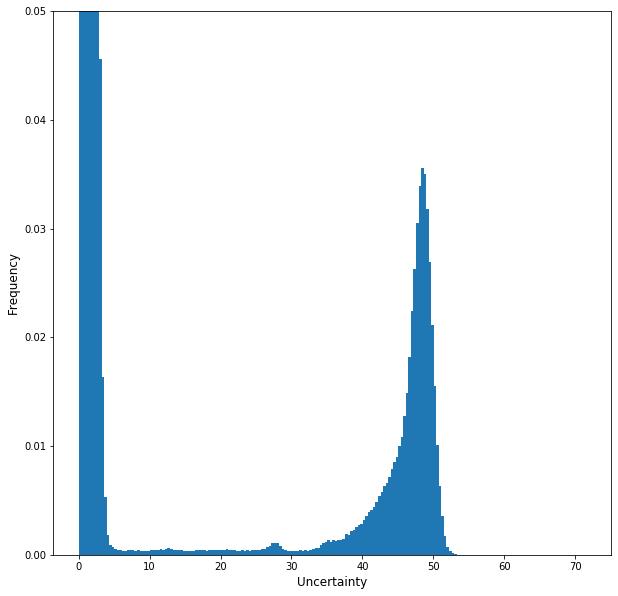

In [17]:
fig = plt.figure(figsize=(10,10))
plt.hist(errors_GLADE, bins=200, density=True)
plt.ylabel("Frequency", size='large')
plt.xlabel("Uncertainty", size='large')
plt.ylim(0.0, 0.05)
plt.show()

## Comparison

In [ ]:
equality = [-750.0, 750.0]
v1 = []
e_v1 = []
v2 = []
e_v2 = []

#for g in galaxies:
for i in range(0,5):
    g = galaxies[i]
    v1.append(g.v2MTF)
    e_v1.append(g.s2MTF)
    v2.append(g.vBORG)
    e_v2.append(g.sBORG)

#e_v2 = np.zeros(len(v2))
fig = plt.figure(figsize = (10,10))

plt.errorbar(v1, v2, xerr = e_v1, yerr=e_v2, fmt='o')
plt.errorbar(equality, equality, fmt='-')
plt.legend(loc='lower right')
plt.ylim((-500, 500)) 
#plt.axis('equal')

plt.show()

## Tests

In [ ]:
for i in range(5):
    print(galaxies[i].properties())
    print("---")

In [ ]:
print(len(galaxies))

In [ ]:
for i in range(len(num_id)):
    print(num_id[i], PGC_id[i])

In [ ]:
v = velocity_Carrick[:]
print(v[:,42, 42, 42])
print(velocity_Carrick[:,42,42,42])
#print(velocity_Carrick[42,42,42])
#print(v[42,42,42])

In [ ]:
count_none = 0
for g in galaxies:
    if g.dist == None:
        #print(g.num)
        count_none += 1
print(count_none)

In [ ]:
galaxies[1900].properties()

In [ ]:
names = []

for g in galaxies:
    names.append(g.name)
    
print(len(names))

unique = np.unique(names)
print(unique.size)

In [ ]:
g = galaxies[42]
SkyCoord(ra=g.RA*u.degree, dec=g.dec*u.degree, distance=1e42)

In [ ]:
print(vx_mean[0,0,255])
print(vx_mean[0,0,-1])

In [ ]:
if 255 <= 255:
    print("oi")

In [ ]:
import time

for times in range(20):
    g_RA = np.random.random()*360.0
    g_dec = (np.random.random()-0.5)*90.0
    dist = np.random.random()*200.0

    print("RA:", g_RA, "dec:", g_dec, "dist:", dist)

    coord = SkyCoord(ra=g_RA*u.degree, dec=g_dec*u.degree, distance=dist)

    x = coord.galactic.cartesian.x
    y = coord.galactic.cartesian.y
    z = coord.galactic.cartesian.z


    r = np.sqrt(np.square(x) + np.square(y) + np.square(z))

    i = (x + 700.0)*(256.0/750.0)
    j = (y + 375.0)*(256.0/750.0)
    k = (z + 50.0)*(256.0/750.0) 

    # Interpolation based on the nearest points
    #selecting the points in the grid
    i0 = int(np.floor(i))
    i1 = int(np.ceil(i))
    j0 = int(np.floor(j))
    j1 = int(np.ceil(j))
    k0 = int(np.floor(k))
    k1 = int(np.ceil(k))

    if(i1 <= 255 and j1 <= 255 and k1 <= 255 and i0 >= 0 and j0 >= 0 and k0 >= 0):
        print(">> OK")
        #velecocity values
        start_time = time.time()
        avg_vx = interpolate(vx_mean[k0,j0,i0], vx_mean[k0,j0,i1], vx_mean[k0,j1,i0], 
                             vx_mean[k0,j1,i1], vx_mean[k1,j0,i0], vx_mean[k1,j0,i1], 
                             vx_mean[k1,j1,i0], vx_mean[k1,j1,i1], i, i0, i1, j, j0,
                             j1, k, k0, k1)
        avg_vy = interpolate(vy_mean[k0,j0,i0], vy_mean[k0,j0,i1], vy_mean[k0,j1,i0], 
                             vy_mean[k0,j1,i1], vy_mean[k1,j0,i0], vy_mean[k1,j0,i1], 
                             vy_mean[k1,j1,i0], vy_mean[k1,j1,i1], i, i0, i1, j, j0,
                             j1, k, k0, k1)
        avg_vz = interpolate(vz_mean[k0,j0,i0], vz_mean[k0,j0,i1], vz_mean[k0,j1,i0], 
                             vz_mean[k0,j1,i1], vz_mean[k1,j0,i0], vz_mean[k1,j0,i1], 
                             vz_mean[k1,j1,i0], vz_mean[k1,j1,i1], i, i0, i1, j, j0,
                             j1, k, k0, k1)

        # error values
        # interpolate it as well
        avg_vx_var = interpolate(vx_var[k0,j0,i0], vx_var[k0,j0,i1], vx_var[k0,j1,i0], 
                                 vx_var[k0,j1,i1], vx_var[k1,j0,i0], vx_var[k1,j0,i1], 
                                 vx_var[k1,j1,i0], vx_var[k1,j1,i1], i, i0, i1, j, j0,
                                 j1, k, k0, k1)
        avg_vy_var = interpolate(vy_var[k0,j0,i0], vy_var[k0,j0,i1], vy_var[k0,j1,i0], 
                                 vy_var[k0,j1,i1], vy_var[k1,j0,i0], vy_var[k1,j0,i1], 
                                 vy_var[k1,j1,i0], vy_var[k1,j1,i1], i, i0, i1, j, j0,
                                 j1, k, k0, k1)
        avg_vz_var = interpolate(vz_var[k0,j0,i0], vz_var[k0,j0,i1], vz_var[k0,j1,i0], 
                                 vz_var[k0,j1,i1], vz_var[k1,j0,i0], vz_var[k1,j0,i1], 
                                 vz_var[k1,j1,i0], vz_var[k1,j1,i1], i, i0, i1, j, j0,
                                 j1, k, k0, k1)

        #peculiar velocity (radial direction)
        vp = (avg_vx*x + avg_vy*y + avg_vz*z)/r
        vp_e = np.sqrt(avg_vx_var*np.square(x) + 
                       avg_vy_var*np.square(y) + 
                       avg_vz_var*np.square(z))/r
        t_1 = time.time() - start_time
        
        
        #Monte Carlo
        start_time = time.time()
        vx_000 = np.random.normal(vx_mean[k0,j0,i0], np.sqrt(vx_var[k0,j0,i0]), 1000)
        vx_001 = np.random.normal(vx_mean[k0,j0,i1], np.sqrt(vx_var[k0,j0,i1]), 1000)
        vx_010 = np.random.normal(vx_mean[k0,j1,i0], np.sqrt(vx_var[k0,j1,i0]), 1000)
        vx_011 = np.random.normal(vx_mean[k0,j1,i1], np.sqrt(vx_var[k0,j1,i1]), 1000)
        vx_100 = np.random.normal(vx_mean[k1,j0,i0], np.sqrt(vx_var[k1,j0,i0]), 1000)
        vx_101 = np.random.normal(vx_mean[k1,j0,i1], np.sqrt(vx_var[k1,j0,i1]), 1000)
        vx_110 = np.random.normal(vx_mean[k1,j1,i0], np.sqrt(vx_var[k1,j1,i0]), 1000)
        vx_111 = np.random.normal(vx_mean[k1,j1,i1], np.sqrt(vx_var[k1,j1,i1]), 1000)

        vy_000 = np.random.normal(vy_mean[k0,j0,i0], np.sqrt(vy_var[k0,j0,i0]), 1000)
        vy_001 = np.random.normal(vy_mean[k0,j0,i1], np.sqrt(vy_var[k0,j0,i1]), 1000)
        vy_010 = np.random.normal(vy_mean[k0,j1,i0], np.sqrt(vy_var[k0,j1,i0]), 1000)
        vy_011 = np.random.normal(vy_mean[k0,j1,i1], np.sqrt(vy_var[k0,j1,i1]), 1000)
        vy_100 = np.random.normal(vy_mean[k1,j0,i0], np.sqrt(vy_var[k1,j0,i0]), 1000)
        vy_101 = np.random.normal(vy_mean[k1,j0,i1], np.sqrt(vy_var[k1,j0,i1]), 1000)
        vy_110 = np.random.normal(vy_mean[k1,j1,i0], np.sqrt(vy_var[k1,j1,i0]), 1000)
        vy_111 = np.random.normal(vy_mean[k1,j1,i1], np.sqrt(vy_var[k1,j1,i1]), 1000)

        vz_000 = np.random.normal(vz_mean[k0,j0,i0], np.sqrt(vz_var[k0,j0,i0]), 1000)
        vz_001 = np.random.normal(vz_mean[k0,j0,i1], np.sqrt(vz_var[k0,j0,i1]), 1000)
        vz_010 = np.random.normal(vz_mean[k0,j1,i0], np.sqrt(vz_var[k0,j1,i0]), 1000)
        vz_011 = np.random.normal(vz_mean[k0,j1,i1], np.sqrt(vz_var[k0,j1,i1]), 1000)
        vz_100 = np.random.normal(vz_mean[k1,j0,i0], np.sqrt(vz_var[k1,j0,i0]), 1000)
        vz_101 = np.random.normal(vz_mean[k1,j0,i1], np.sqrt(vz_var[k1,j0,i1]), 1000)
        vz_110 = np.random.normal(vz_mean[k1,j1,i0], np.sqrt(vz_var[k1,j1,i0]), 1000)
        vz_111 = np.random.normal(vz_mean[k1,j1,i1], np.sqrt(vz_var[k1,j1,i1]), 1000)

        sample_vx = interpolate(vx_000, vx_001, vx_010, vx_011, vx_100, vx_101, vx_110, vx_111,  
                                i, i0, i1, j, j0, j1, k, k0, k1)
        sample_vy = interpolate(vy_000, vy_001, vy_010, vy_011, vy_100, vy_101, vy_110, vy_111,  
                                i, i0, i1, j, j0, j1, k, k0, k1)
        sample_vz = interpolate(vz_000, vz_001, vz_010, vz_011, vz_100, vz_101, vz_110, vz_111,  
                                i, i0, i1, j, j0, j1, k, k0, k1)

        sample_vp_mc = (sample_vx*x + sample_vy*y + sample_vz*z)/r
        vp_mc = np.mean(sample_vp_mc)
        vp_e_mc = np.std(sample_vp_mc)
        t_2 = time.time() - start_time


        print("Interpolation:", vp, "±", vp_e, "in", t_1, "s")
        print("Monte Carlo:", vp_mc, "±", vp_e_mc, "in", t_2, "s")
        print()
    else:
        print(">> Outside of the range")
        print()